Die Outputs geben einen ursprünglichen Data Report.

In [5]:
import pandas as pd
from ydata_profiling import ProfileReport

data = pd.read_csv('movies.csv')
profile = ProfileReport(data)
profile.to_file("output_movies.html")


C:\Users\André\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:357: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
import pandas as pd

# Load your CSV file
file_path_movie = 'movies.csv'  # Replace with the actual path to your file
file_path_links = 'links.csv'
file_path_ratings = 'ratings.csv'

# Read the CSV file
df_m = pd.read_csv(file_path_movie)
df_l = pd.read_csv(file_path_links)
df_r = pd.read_csv(file_path_ratings)

# Display the first few rows
print(df_m.head())



   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [7]:
print(df_l.head())


   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [8]:
print(df_r.head())

   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858


- Do a visualization on the genres
- Do visualization on which are the most common movies
- Which are the favourite movies (most 5 star ratings)



So I have userID, movieID, rating, name, genre left

In [5]:
import pandas as pd

# File paths
file_path_movie = 'movies.csv'
file_path_ratings = 'ratings.csv'

# Read the CSV files into DataFrames
df_movies = pd.read_csv(file_path_movie)
df_ratings = pd.read_csv(file_path_ratings)

# Merge the DataFrames on 'movieId'
df_full = pd.merge(df_movies, df_ratings, on='movieId')

# Display the first few rows of the merged DataFrame
print(df_full.head())




   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0      10     2.5  1169265231  
1      11     3.0   850085076  
2      17     4.0  1027305751  
3      19     3.0   974704488  
4      20     5.0  1553184230  


In [6]:
# Remove rows with missing values in df_full
df_full_clean = df_full.dropna()

# Display the first few rows of the cleaned DataFrame
print(df_full_clean.head())


   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0      10     2.5  1169265231  
1      11     3.0   850085076  
2      17     4.0  1027305751  
3      19     3.0   974704488  
4      20     5.0  1553184230  


In [7]:
df_final = df_full_clean.drop('timestamp', axis=1)

print(df_final.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating  
0      10     2.5  
1      11     3.0  
2      17     4.0  
3      19     3.0  
4      20     5.0  


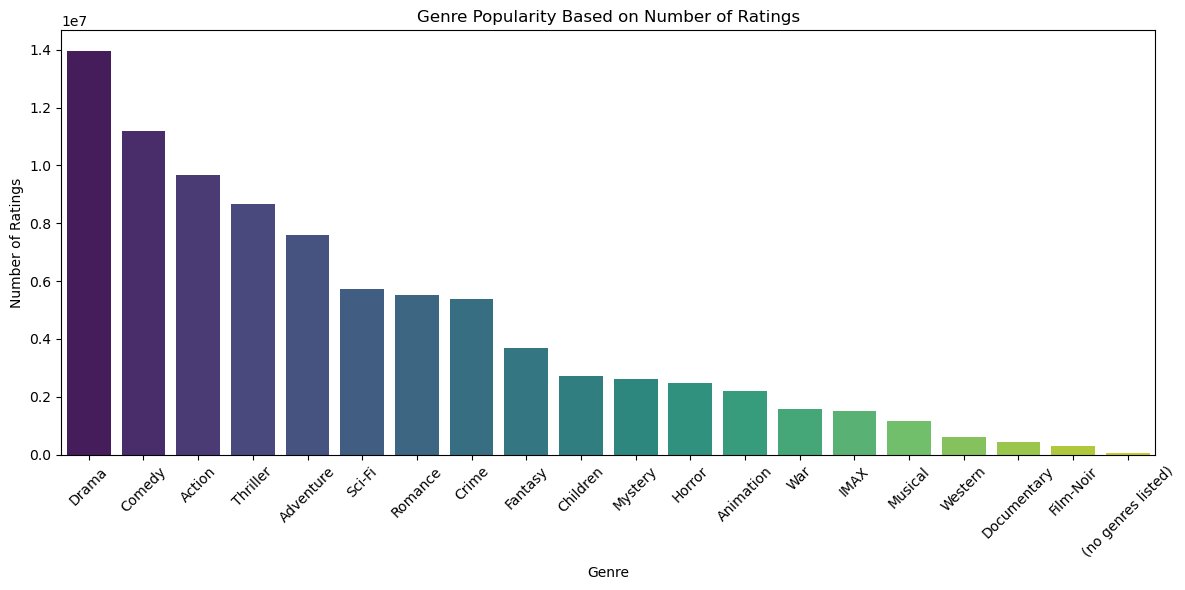

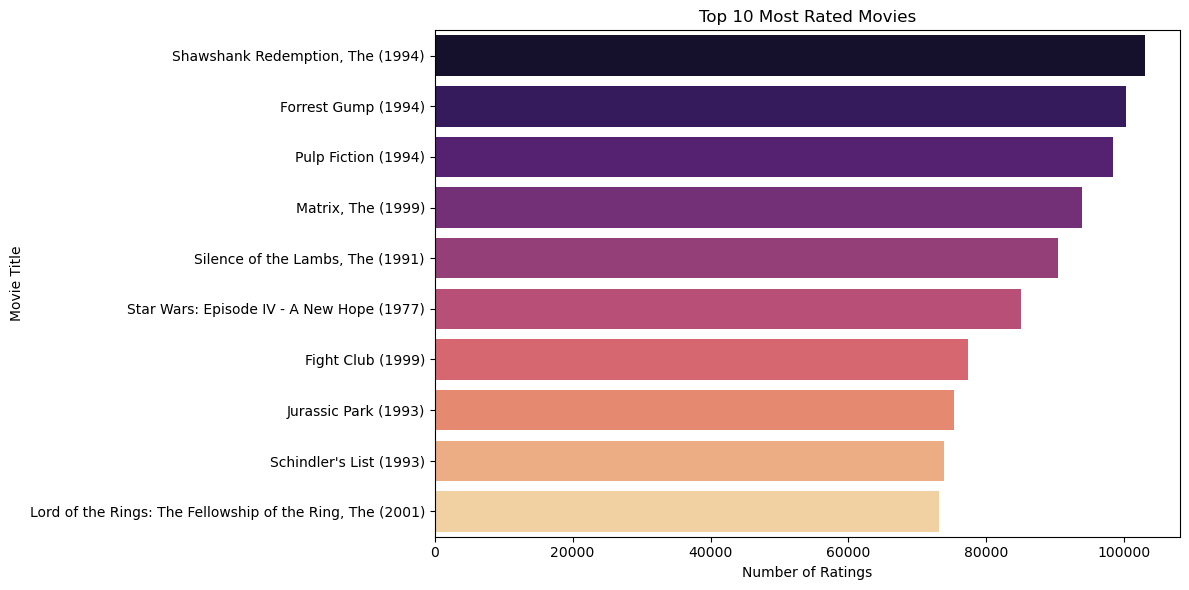

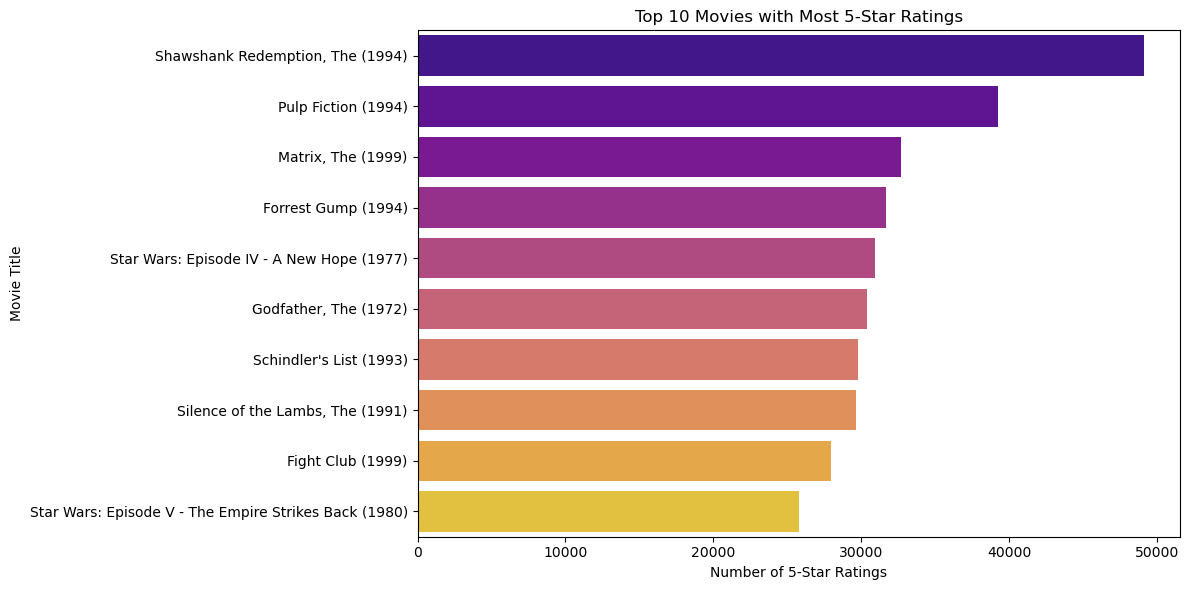

In [8]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Genres Popularity

# Step 1: Prepare the Data
df_genres = df_final.copy()
df_genres['genre_list'] = df_genres['genres'].str.split('|')
df_genres_exploded = df_genres.explode('genre_list')

# Step 2: Count Genre Occurrences
genre_counts = df_genres_exploded['genre_list'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Step 3: Visualize the Data
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='Genre', y='Count', palette='viridis')
plt.xticks(rotation=45)
plt.title('Genre Popularity Based on Number of Ratings')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()

# Visualization 2: Most Common Movies

# Step 1: Count Ratings per Movie
movie_rating_counts = df_full_clean.groupby(['movieId', 'title']).size().reset_index(name='RatingCount')
top_movies = movie_rating_counts.sort_values('RatingCount', ascending=False).head(10)

# Step 2: Visualize the Data
plt.figure(figsize=(12, 6))
sns.barplot(data=top_movies, x='RatingCount', y='title', palette='magma', orient='h')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

# Visualization 3: Favorite Movies (Most 5-Star Ratings)

# Step 1: Filter for 5-Star Ratings
df_5_star = df_full_clean[df_full_clean['rating'] == 5.0]

# Step 2: Count 5-Star Ratings per Movie
five_star_counts = df_5_star.groupby(['movieId', 'title']).size().reset_index(name='FiveStarCount')
top_favorite_movies = five_star_counts.sort_values('FiveStarCount', ascending=False).head(10)

# Step 3: Visualize the Data
plt.figure(figsize=(12, 6))
sns.barplot(data=top_favorite_movies, x='FiveStarCount', y='title', palette='plasma', orient='h')
plt.title('Top 10 Movies with Most 5-Star Ratings')
plt.xlabel('Number of 5-Star Ratings')
plt.ylabel('Movie Title')
plt.tight_layout()
#plt.show()


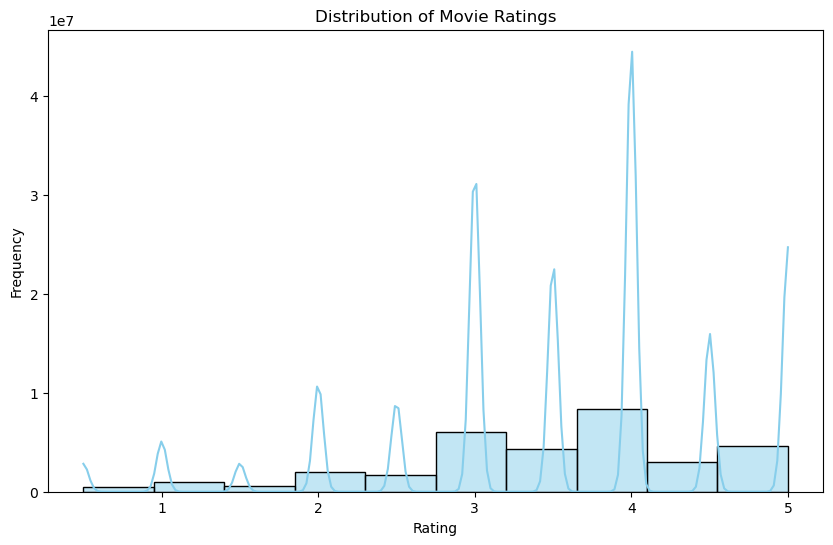

In [9]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a histogram of the ratings
sns.histplot(df_full_clean['rating'], bins=10, kde=True, color='skyblue')

# Set plot title and labels
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Display the plot
plt.show()

#Distribution of Movie Ratings
#Objective: Visualize the overall distribution of movie ratings to understand how users rate movies in general.


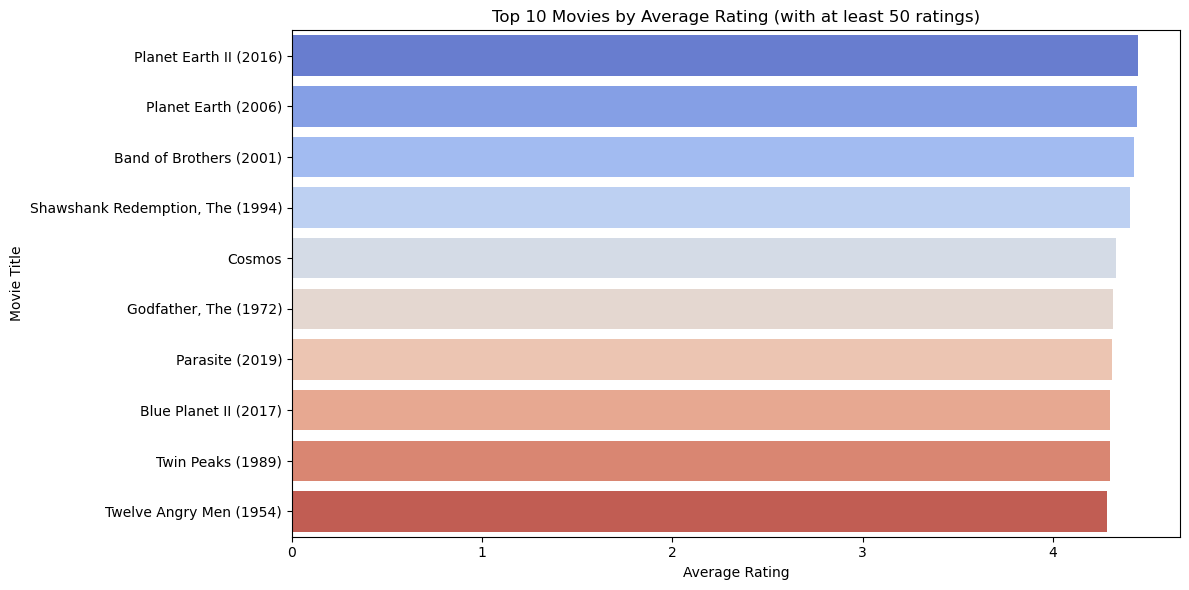

In [10]:
# Calculate average rating per movie
average_ratings = df_full_clean.groupby(['movieId', 'title'])['rating'].mean().reset_index()

# Sort movies by average rating and number of ratings to ensure reliability
average_ratings['RatingCount'] = df_full_clean.groupby(['movieId', 'title'])['rating'].count().reset_index()['rating']
reliable_avg_ratings = average_ratings[average_ratings['RatingCount'] >= 50]  # Consider movies with at least 50 ratings

top_avg_rated_movies = reliable_avg_ratings.sort_values('rating', ascending=False).head(10)

# Visualize the top average rated movies
plt.figure(figsize=(12, 6))
sns.barplot(data=top_avg_rated_movies, x='rating', y='title', palette='coolwarm', orient='h')
plt.title('Top 10 Movies by Average Rating (with at least 50 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

#Average Rating per Movie
#Objective: Identify movies with the highest average ratings to see which movies are rated favorably on average.


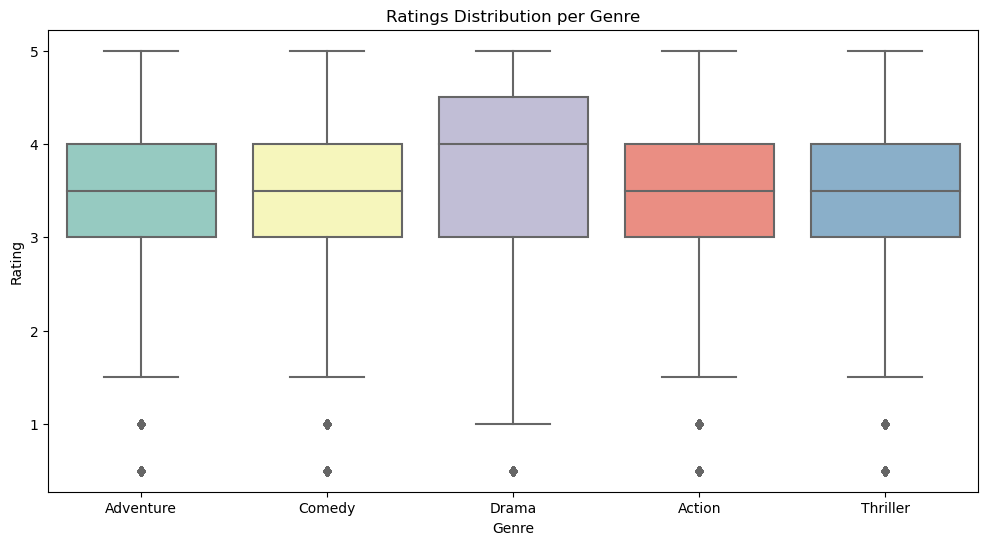

In [11]:
# Prepare the data by exploding genres
df_genres_exploded = df_full_clean.copy()
df_genres_exploded['genre_list'] = df_genres_exploded['genres'].str.split('|')
df_genres_exploded = df_genres_exploded.explode('genre_list')

# Select a few popular genres for clarity
popular_genres = df_genres_exploded['genre_list'].value_counts().head(5).index
df_top_genres = df_genres_exploded[df_genres_exploded['genre_list'].isin(popular_genres)]

# Create a boxplot of ratings per genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_genres, x='genre_list', y='rating', palette='Set3')
plt.title('Ratings Distribution per Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

#Ratings Distribution per Genre
#Objective: Analyze how different genres are rated by visualizing the distribution of ratings within each genre.

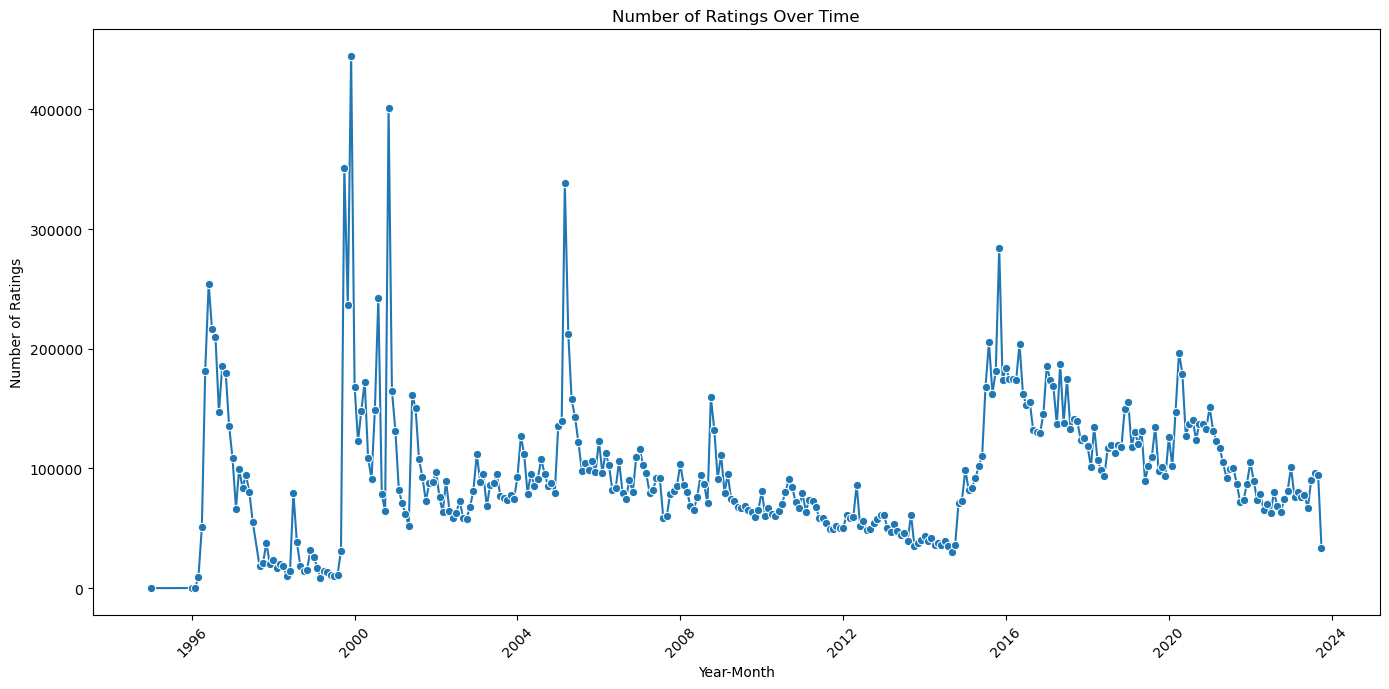

In [12]:
# Ensure 'timestamp' is in datetime format
df_full_clean['timestamp'] = pd.to_datetime(df_full_clean['timestamp'], unit='s')

# Group by year and month
df_full_clean['year_month'] = df_full_clean['timestamp'].dt.to_period('M')
ratings_over_time = df_full_clean.groupby('year_month').size().reset_index(name='RatingCount')

# Convert 'year_month' to datetime for plotting
ratings_over_time['year_month'] = ratings_over_time['year_month'].dt.to_timestamp()

# Plot the number of ratings over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=ratings_over_time, x='year_month', y='RatingCount', marker='o')
plt.title('Number of Ratings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Number of Ratings Over Time
#Objective: Examine how the volume of ratings has changed over time, which can indicate changes in user engagement or movie popularity.

Für den obrigen Chart:

Ich habe timestamp rausgelöscht, da wir es nicht benötigen, aber trotzdem interessant zu sehen, ob wir ein Ungleichgewicht haben, was Dateneintragung angeht. Sieht aber gut aus denke ich

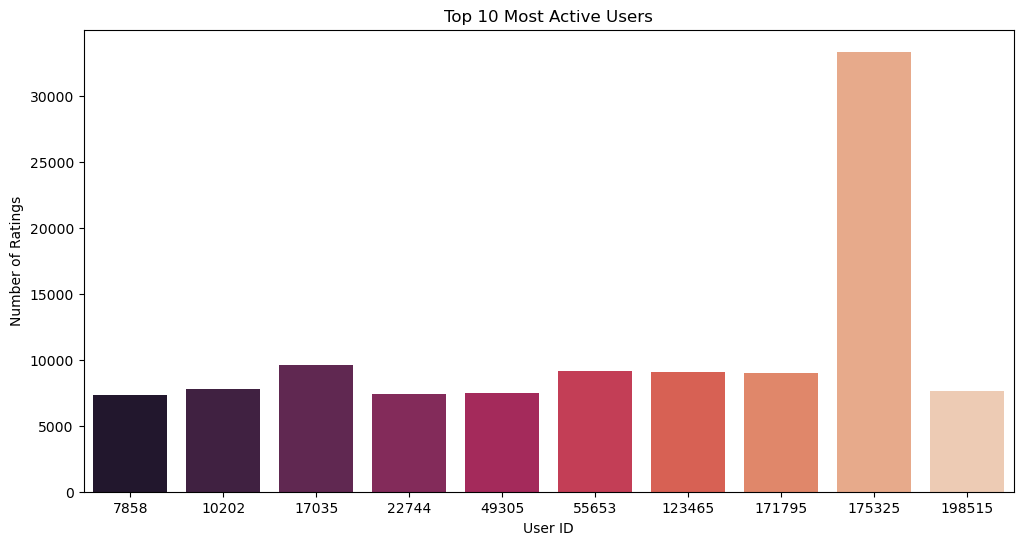

In [14]:
# Count the number of ratings per user
user_rating_counts = df_full_clean.groupby('userId').size().reset_index(name='RatingCount')

# Identify the top 10 most active users
top_active_users = user_rating_counts.sort_values('RatingCount', ascending=False).head(10)

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(data=top_active_users, x='userId', y='RatingCount', palette='rocket')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

#User Rating Behavior
#Objective: Analyze the rating behavior of users, such as identifying the most active users.

Können wir besprechen, ob das ein Problem ist, dass ein User mehr als 30k Bewertungen gegeben hat. 

Einerseits hat seine Meinung deutlich mehr Gewicht im datenset, andererseits kriegen wir auch viele Bewertungen und daten daraus um ähnliche Movies zu finden. 

Total ratings by user 175325: 33151
Number of unique movies rated by user 175325: 33151
User 175325 rated each movie only once.


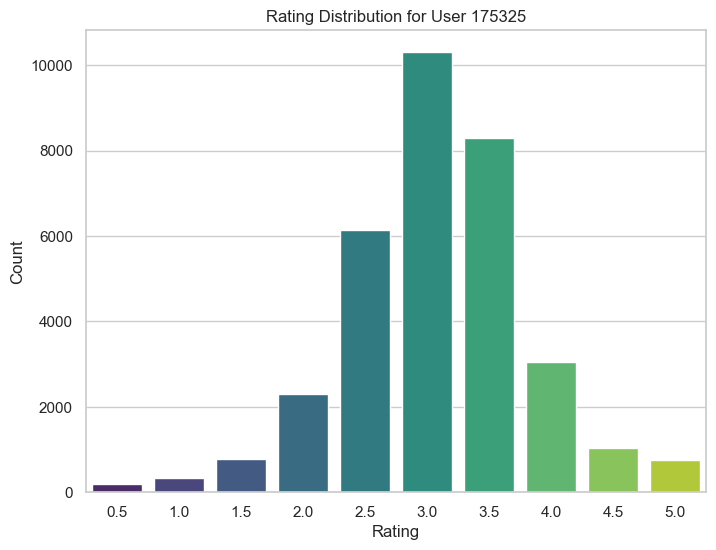


Average rating given by user 175325: 3.08

Rating counts:
rating
0.5      186
1.0      332
1.5      780
2.0     2292
2.5     6138
3.0    10310
3.5     8288
4.0     3052
4.5     1024
5.0      749
Name: count, dtype: int64


C:\Users\André\AppData\Local\Temp\ipykernel_18240\2088021999.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_175325_ratings['timestamp'] = pd.to_datetime(user_175325_ratings['timestamp'], unit='s')
C:\Users\André\AppData\Local\Temp\ipykernel_18240\2088021999.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_175325_ratings['year_month'] = user_175325_ratings['timestamp'].dt.to_period('M')


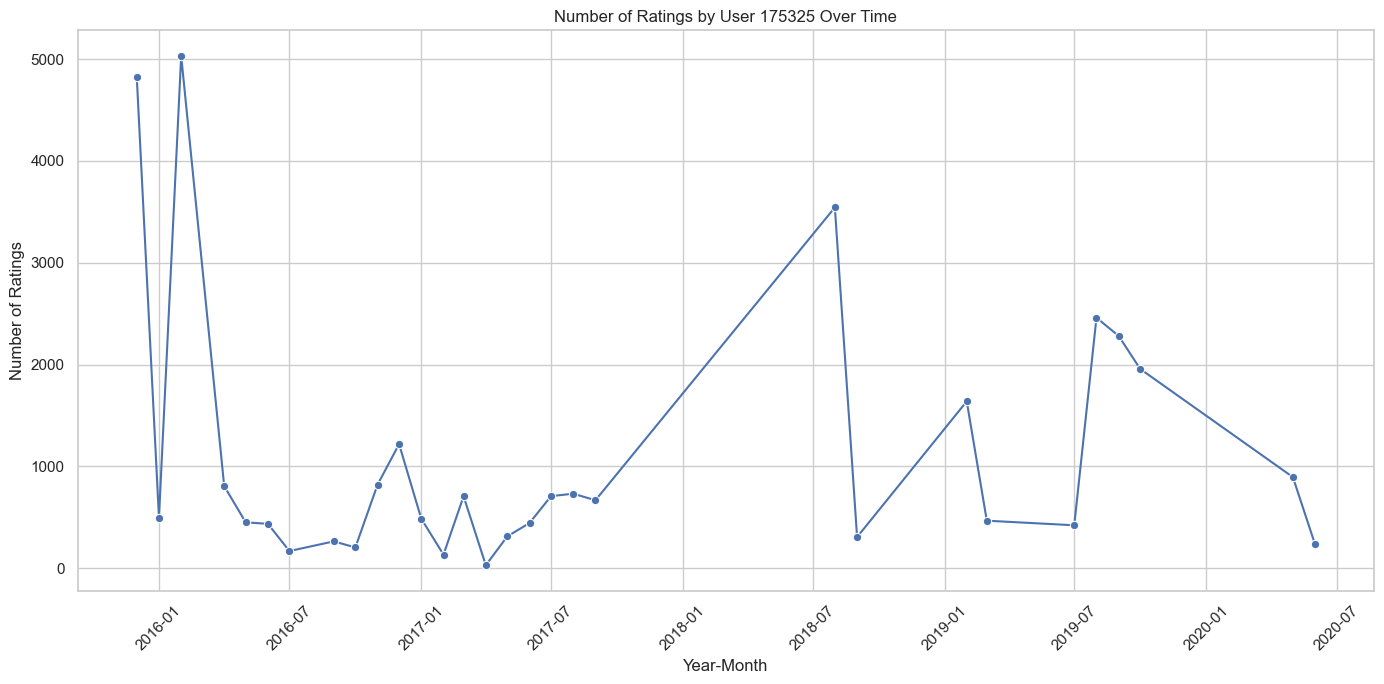

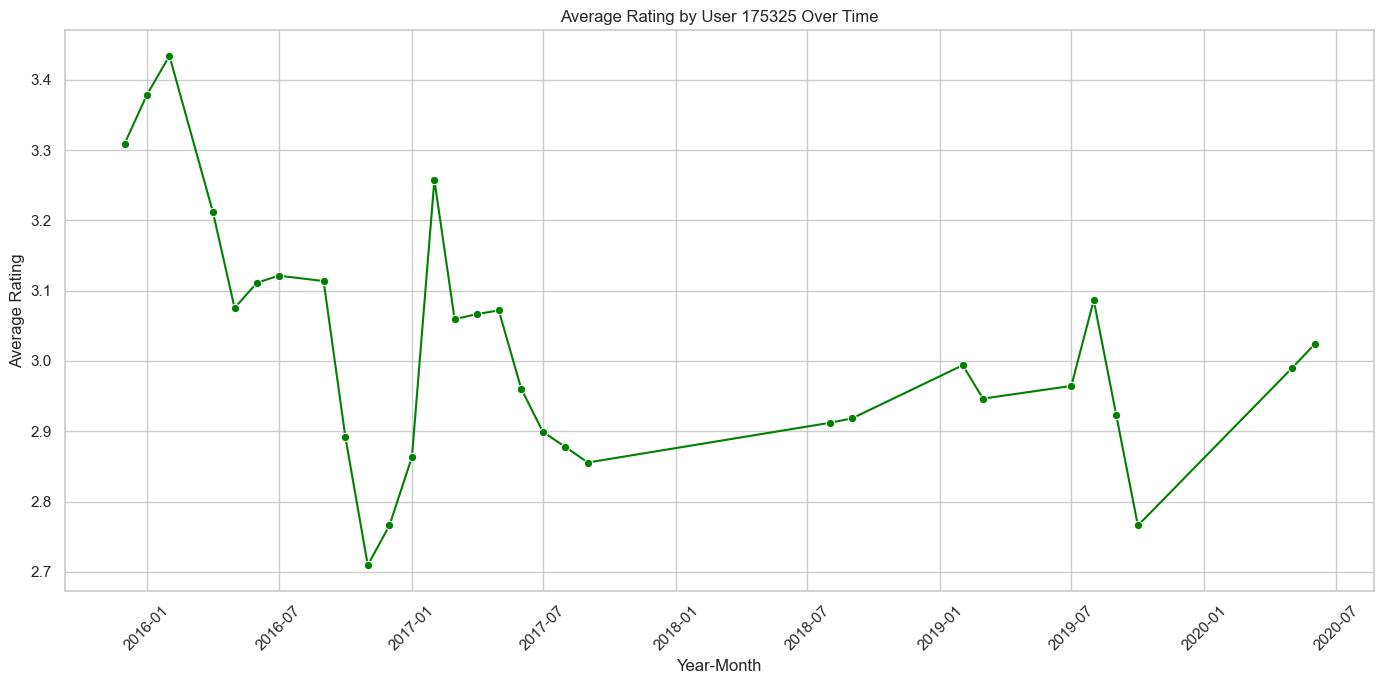

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display inline if using a notebook
%matplotlib inline

# Set plot style
sns.set(style='whitegrid')

# Step 1: Filter the Data for User 175325
user_175325_ratings = df_full_clean[df_full_clean['userId'] == 175325]
total_ratings = len(user_175325_ratings)
print(f"Total ratings by user 175325: {total_ratings}")

# Step 2: Check the Number of Unique Movies Rated
unique_movies = user_175325_ratings['movieId'].nunique()
print(f"Number of unique movies rated by user 175325: {unique_movies}")

# Step 3: Determine If the User Rated the Same Movies Multiple Times
if unique_movies == total_ratings:
    print("User 175325 rated each movie only once.")
else:
    print("User 175325 rated some movies multiple times.")
    duplicate_ratings = user_175325_ratings.groupby('movieId').size().reset_index(name='RatingCount')
    duplicate_movies = duplicate_ratings[duplicate_ratings['RatingCount'] > 1]
    print(f"Number of movies rated multiple times: {len(duplicate_movies)}")
    if len(duplicate_movies) > 0:
        print("Movies rated multiple times by user 175325:")
        print(duplicate_movies)

# Step 4: Visualize User 175325's Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=user_175325_ratings, x='rating', palette='viridis')
plt.title('Rating Distribution for User 175325')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Step 5: Analyze the Rating Tendencies
average_rating = user_175325_ratings['rating'].mean()
print(f"\nAverage rating given by user 175325: {average_rating:.2f}")

rating_counts = user_175325_ratings['rating'].value_counts().sort_index()
print("\nRating counts:")
print(rating_counts)

# Step 6: Investigate Time Aspect of Ratings
# Convert timestamp to datetime
user_175325_ratings['timestamp'] = pd.to_datetime(user_175325_ratings['timestamp'], unit='s')

# Extract year and month
user_175325_ratings['year_month'] = user_175325_ratings['timestamp'].dt.to_period('M')

# Ratings over time
ratings_over_time = user_175325_ratings.groupby('year_month').size().reset_index(name='RatingCount')
ratings_over_time['year_month'] = ratings_over_time['year_month'].dt.to_timestamp()

# Plot ratings over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=ratings_over_time, x='year_month', y='RatingCount', marker='o')
plt.title('Number of Ratings by User 175325 Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Average Rating Over Time
avg_rating_over_time = user_175325_ratings.groupby('year_month')['rating'].mean().reset_index()
avg_rating_over_time['year_month'] = avg_rating_over_time['year_month'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_rating_over_time, x='year_month', y='rating', marker='o', color='green')
plt.title('Average Rating by User 175325 Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


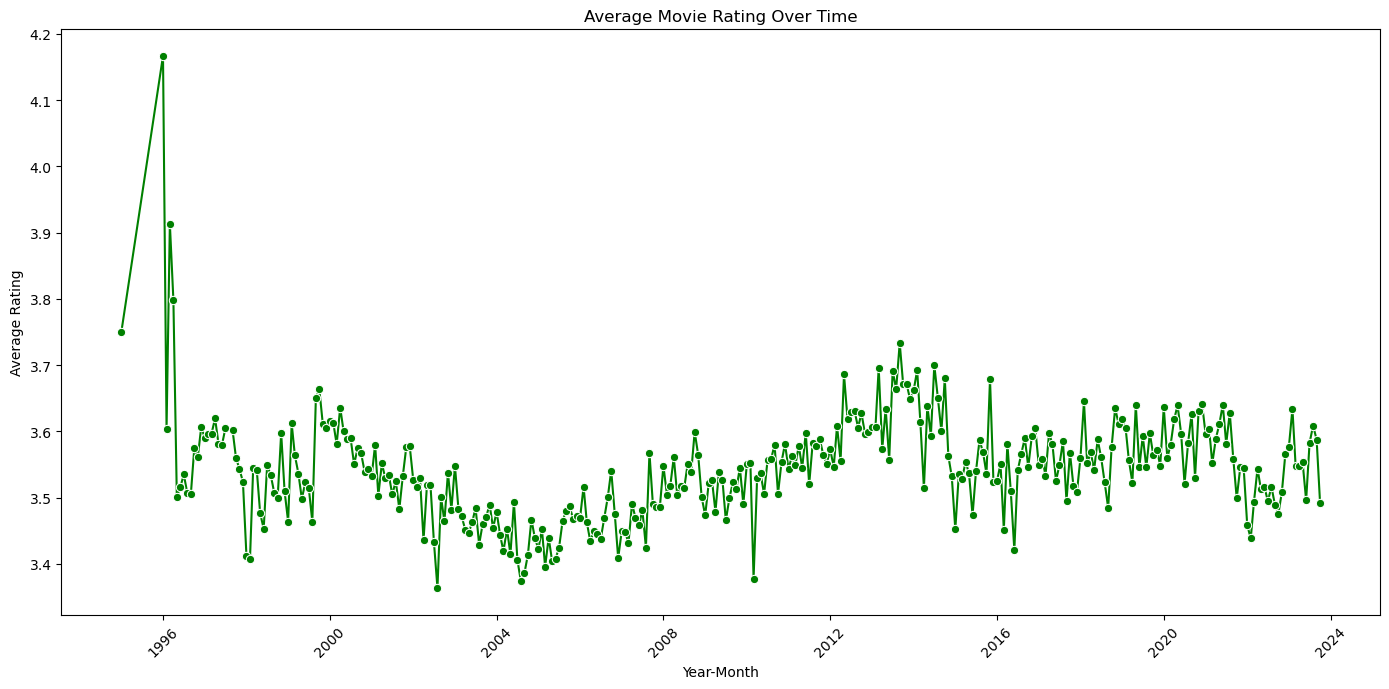

In [15]:
# Group by year and month, calculate average rating
df_full_clean['year_month'] = df_full_clean['timestamp'].dt.to_period('M')
avg_rating_over_time = df_full_clean.groupby('year_month')['rating'].mean().reset_index()

# Convert 'year_month' to datetime for plotting
avg_rating_over_time['year_month'] = avg_rating_over_time['year_month'].dt.to_timestamp()

# Plot the average rating over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_rating_over_time, x='year_month', y='rating', marker='o', color='green')
plt.title('Average Movie Rating Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Average Rating Over Time
#Objective: Explore how the average movie rating changes over time.

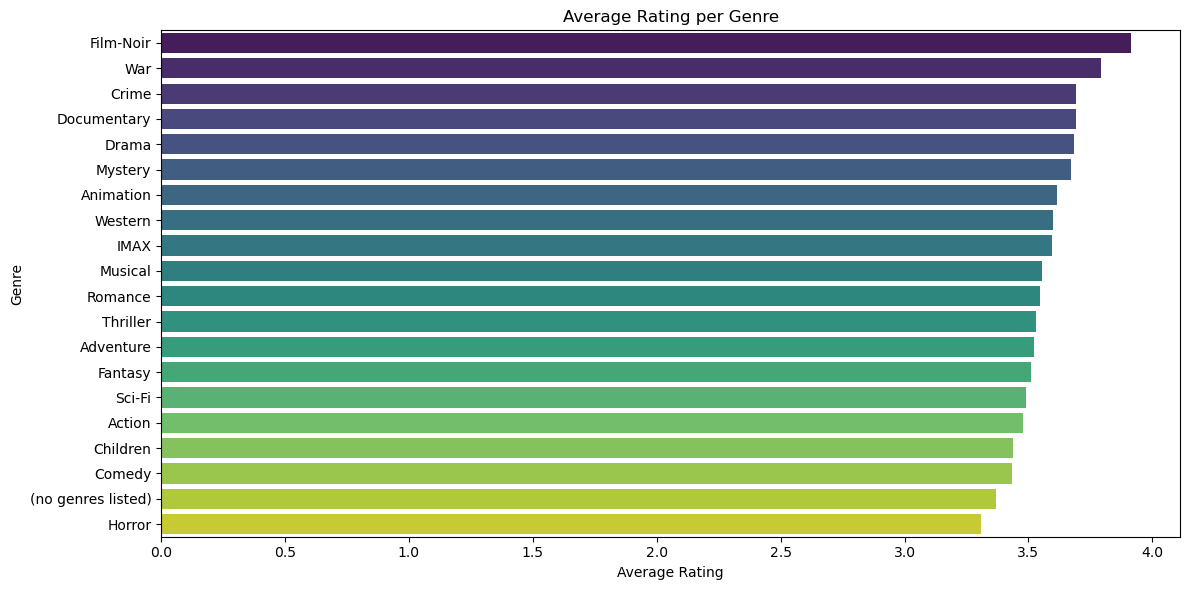

In [16]:
# Calculate average rating per genre
genre_ratings = df_genres_exploded.groupby('genre_list')['rating'].mean().reset_index()
genre_ratings = genre_ratings.sort_values('rating', ascending=False)

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_ratings, x='rating', y='genre_list', palette='viridis', orient='h')
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

#Top Rated Genres
#Objective: Determine which genres have the highest average ratings.

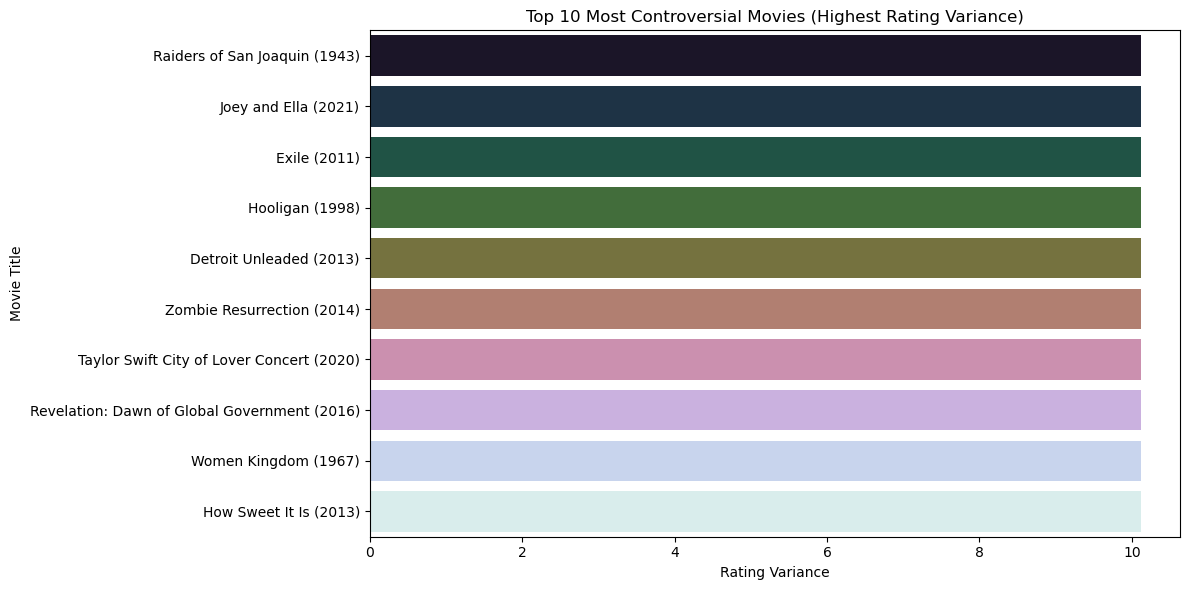

In [17]:
# Calculate rating variance per movie
rating_variance = df_full_clean.groupby(['movieId', 'title'])['rating'].var().reset_index()
rating_variance = rating_variance.dropna()  # Remove movies with only one rating (variance is NaN)
rating_variance = rating_variance.sort_values('rating', ascending=False).head(10)

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_variance, x='rating', y='title', palette='cubehelix', orient='h')
plt.title('Top 10 Most Controversial Movies (Highest Rating Variance)')
plt.xlabel('Rating Variance')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

#Rating Variance per Movie (Most Controversial Movies)
#Objective: Find movies with the highest variance in ratings, indicating that opinions on them are divided.

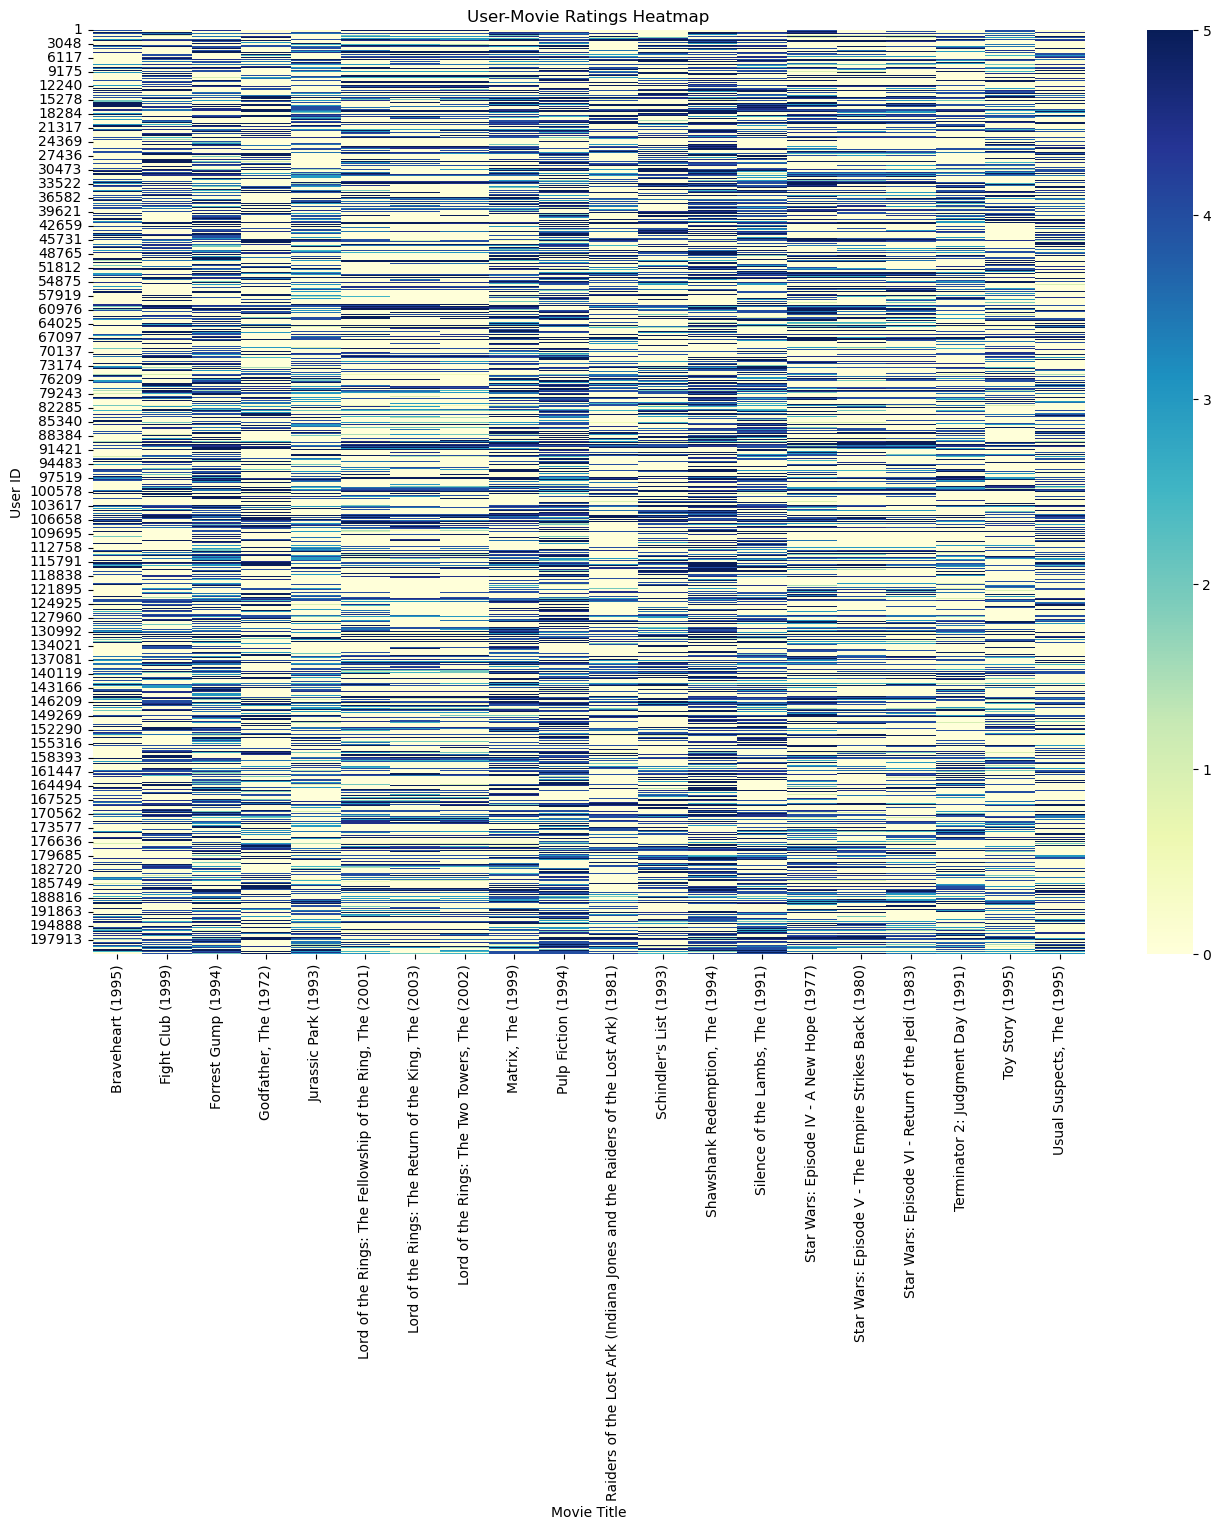

In [20]:
# Create a pivot table of users and their ratings for the top 20 movies
top_movies = df_full_clean['title'].value_counts().head(20).index
df_top_movies = df_full_clean[df_full_clean['title'].isin(top_movies)]

# Create the pivot table
user_movie_matrix = df_top_movies.pivot_table(index='userId', columns='title', values='rating')

# Fill missing values with 0
user_movie_matrix = user_movie_matrix.fillna(0)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(user_movie_matrix, cmap='YlGnBu')
plt.title('User-Movie Ratings Heatmap')
plt.xlabel('Movie Title')
plt.ylabel('User ID')
plt.show()

#Heatmap of User-Item Interactions
#Objective: Visualize the interaction between users and movies to identify patterns in ratings.

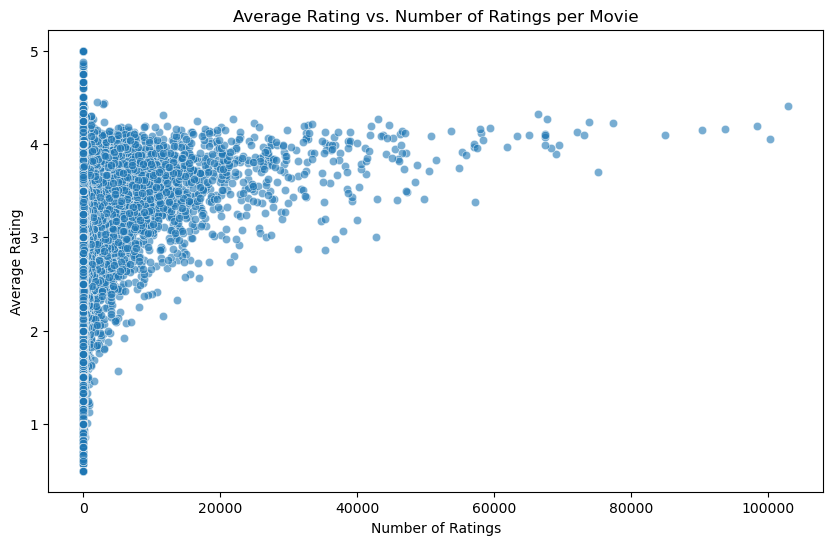

In [21]:
# Calculate average rating and rating count per movie
movie_stats = df_full_clean.groupby(['movieId', 'title']).agg({'rating': ['mean', 'count']})
movie_stats.columns = ['AverageRating', 'RatingCount']
movie_stats = movie_stats.reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_stats, x='RatingCount', y='AverageRating', alpha=0.6)
plt.title('Average Rating vs. Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

#Scatter Plot of Average Rating vs. Number of Ratings
#Objective: Explore the relationship between a movie's average rating and its popularity (number of ratings).